### Import Requirements

In [1]:
 %matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math
import pandas as pd

# Waveform Function

In [2]:
def waveforms(energystart, energyend, adjtime):
    s_energy = UTCDateTime(energystart)
    e_energy = UTCDateTime(energyend)
    start_t = s_energy - adjtime
    end_t = e_energy + adjtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

# Waveform Filter Function

In [3]:
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text

# Wavefrom Plotter Function

In [4]:
def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title(event + "\n" + "UTC " + d, size=10)
    #ax.legend

In [5]:
#Z12 plotter function
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    day = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    
    d = np.radians(-30)
    aU = np.radians(90)
    aV = np.radians(210)
    aW = np.radians(330)
    
    A = np.array([[np.cos(d)*np.sin(aU),np.cos(d)*np.cos(aU),np.sin(d)],
    [np.cos(d)*np.sin(aV), np.cos(d)*np.cos(aV), np.sin(d)],
    [np.cos(d)*np.sin(aW), np.cos(d)*np.cos(aW), np.sin(d)]])
    
    B = np.linalg.inv(A)
    
    E,N,Z = np.dot(B,(U,V,W))

    offset = np.full(len(Z), fill_value=200)

    ax.plot(t, E + 2*offset, label='East', color = "#77e59b", alpha = 0.8)
    ax.plot(t, N + offset, label='North', color = "#ffabab", alpha = 0.8)
    ax.plot(t, Z, label = 'Z', color = "#b28dff", alpha = 0.8)

    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

    if ylim == True:
        ax.set_ylim(-1800,2000)
        
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)

    ax.set_title(event + "\n" + "UTC " + day, size=10)
    #ax.legend

In [6]:
#legend plotter
def legend(ax, row, column):
    st = waveforms("2019-12-19T11:55:00", "2019-12-19T12:08:55", 20*60)
    tr = st[0]
    t = tr.times('matplotlib')
    y = np.zeros(len(t))

    ax[row,column].plot(t, y, label='BHU', color = "#1f77b4", alpha = 0.7)
    ax[row,column].plot(t, y, label='BHV', color = "#ff7f0e", alpha = 0.7)
    ax[row,column].plot(t, y, label='BHW', color = "#2ca02c", alpha = 0.7)
    ax[row,column].plot(t, y, label='E', color = "#77e59b", alpha = 0.8)
    ax[row,column].plot(t, y, label='N', color = "#ffabab", alpha = 0.8)
    ax[row,column].plot(t, y, label = 'Z', color = "#b28dff", alpha = 0.8)
    
    ax[row,column].legend(fontsize = 'x-large', loc = 'center', facecolor = 'white', mode = 'expand', framealpha = 1)
    ax[row,column].get_xaxis().set_visible(False) 
    ax[row,column].get_yaxis().set_visible(False) 

# Subplot Setup

<IPython.core.display.Javascript object>


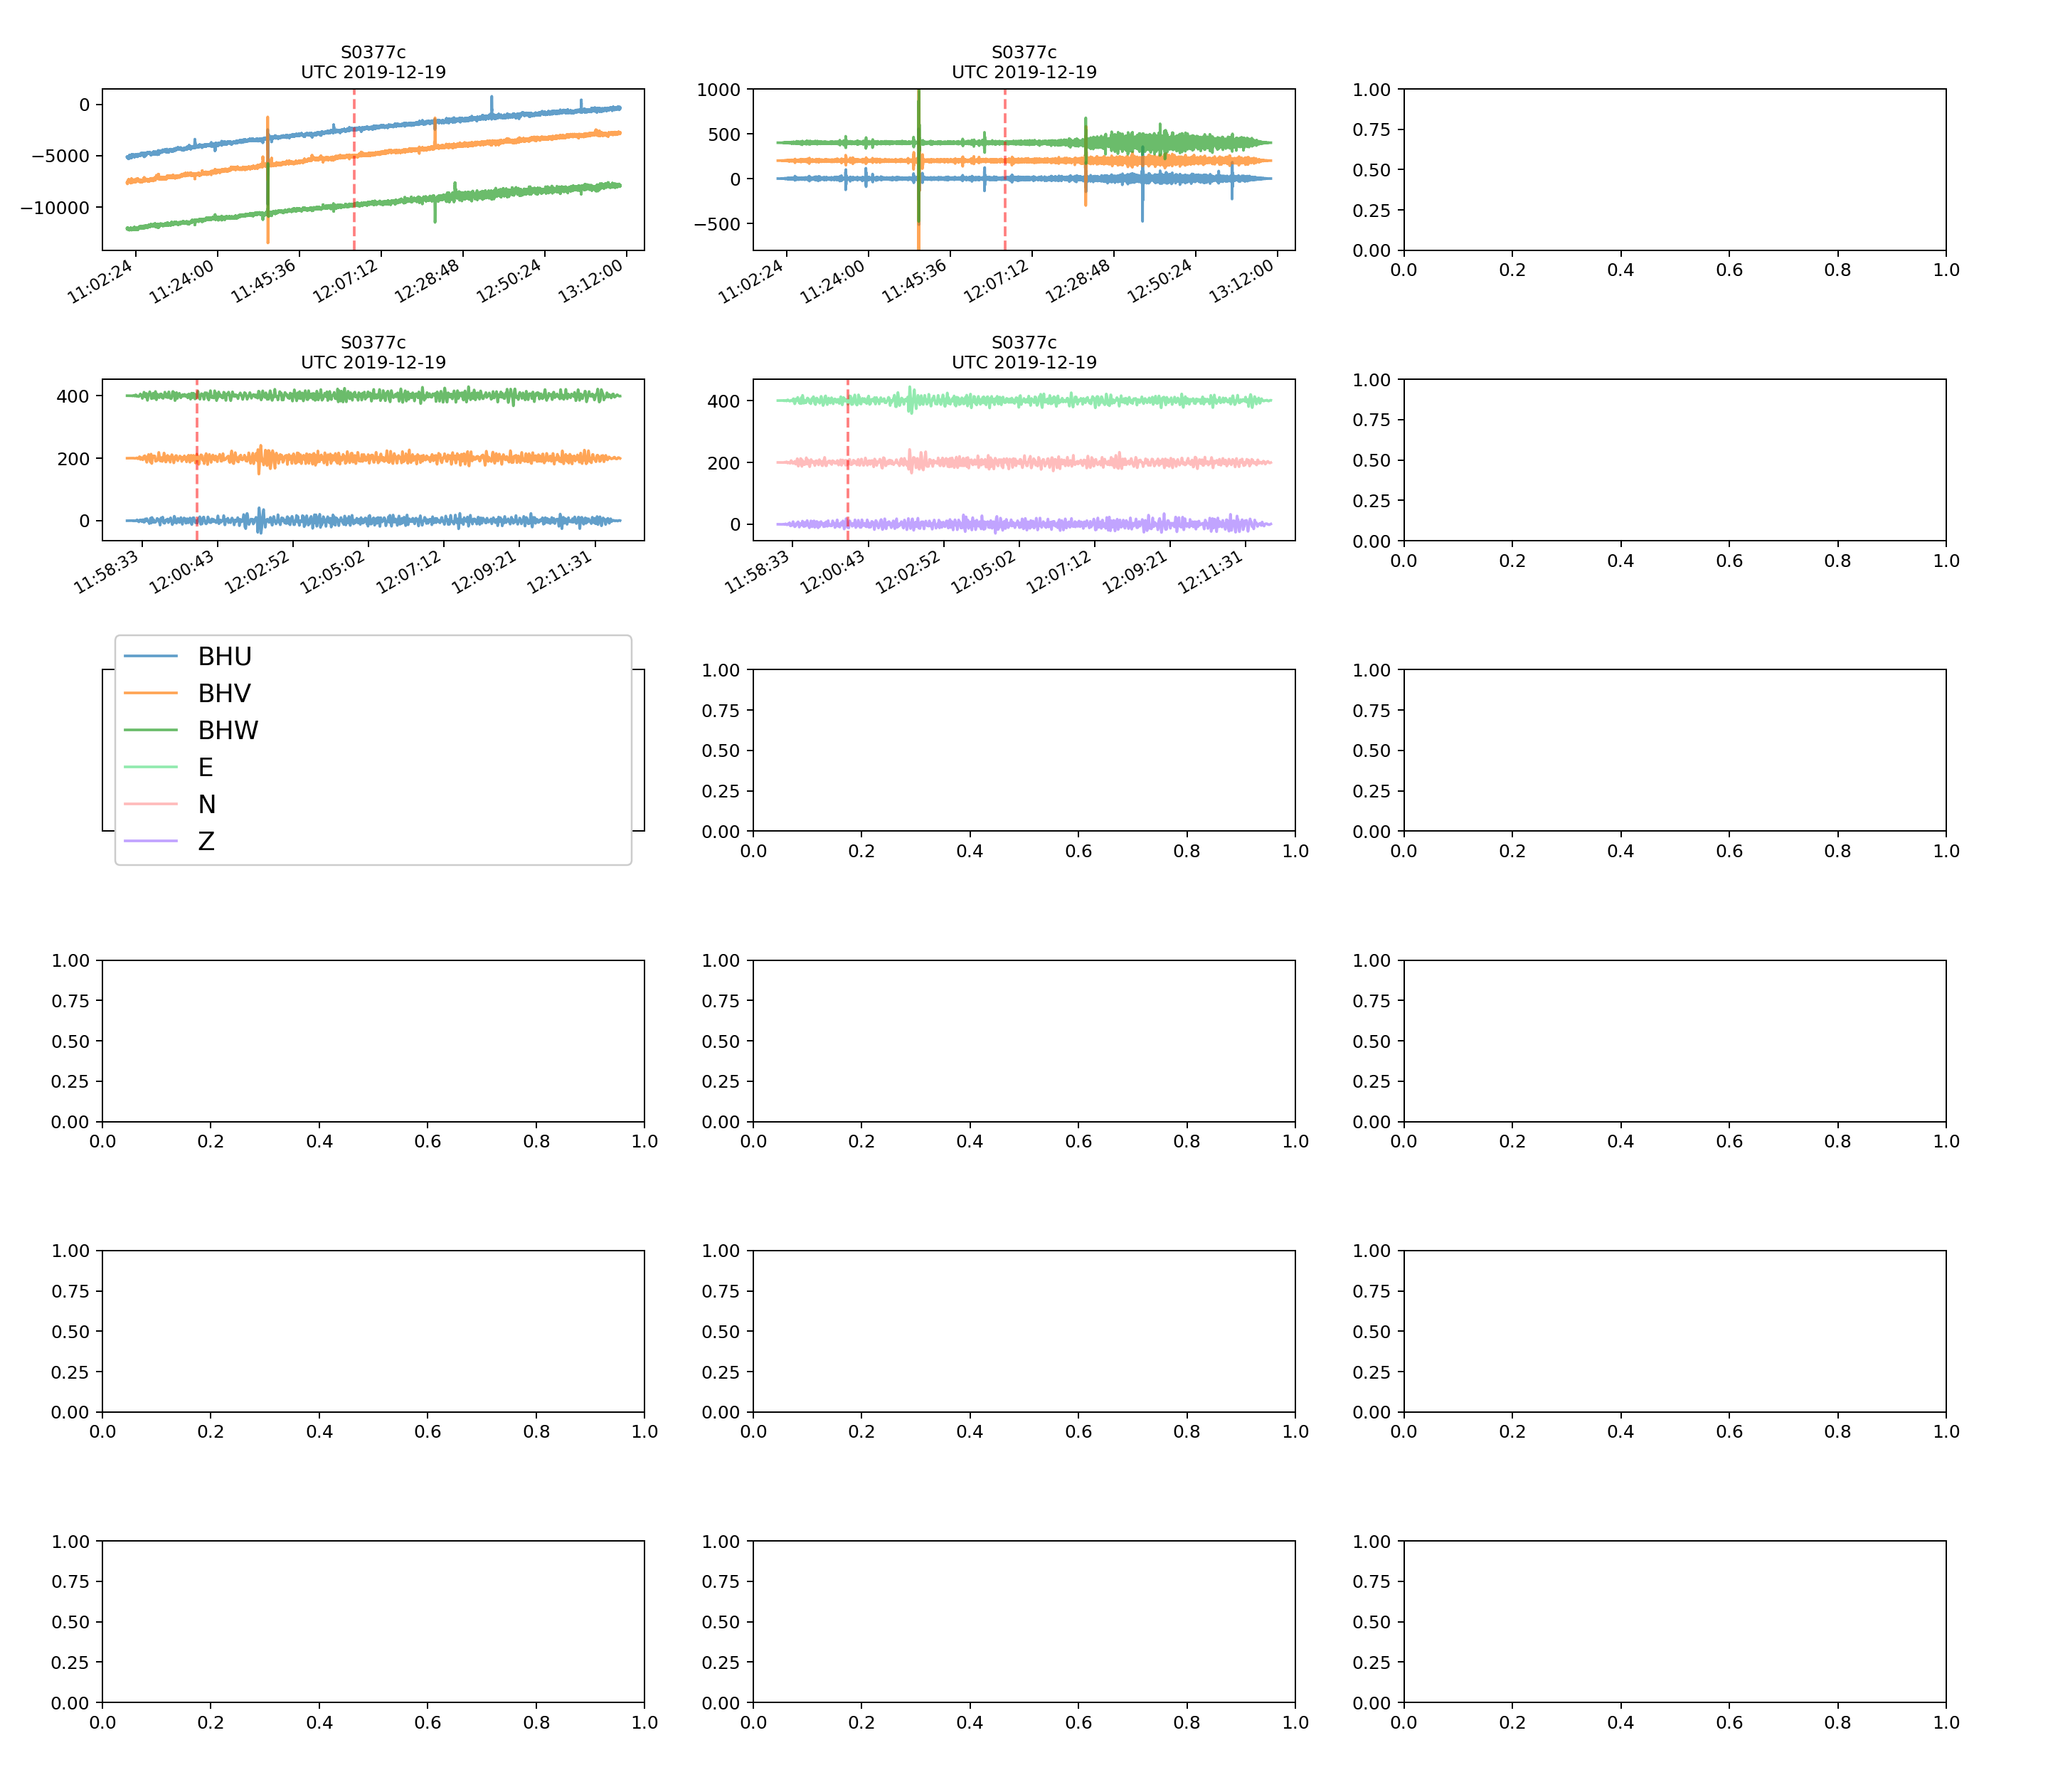

In [7]:
#2hr window + filtered
fig1,ax = plt.subplots(6,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#2hr window + unfiltered
#fig2,ax1 = plt.subplots(6,3, figsize=(16,14))
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#20min window + filtered
#fig3,ax2 = plt.subplots(6,3, figsize=(16,14))
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#Z12 20min window + filtered
#fig4,ax3 = plt.subplots(6,3, figsize=(16,14))
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

# Example

In [8]:
e = 'S0377c'
### 2019-12-19T11:57:20
start377c = '2019-12-19T12:00:08' 
end377c = '2019-12-19T12:10:14'

st377c = waveforms(start377c, end377c, 3600)
waveform_plotter(start377c, st377c, e, ax[0][0])

f377c = waveform_filter(st377c, 'lf')
waveform_plotter(start377c, f377c, e, ax[0][1], ylim=True)

short377c = waveforms(start377c, end377c, 120)
sf377c = waveform_filter(short377c, 'lf')
waveform_plotter(start377c, sf377c, e, ax[1][0])

xyz_plotter(start377c, sf377c, e, ax[1][1])

legend(ax, 2, 0)